In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from astropy import units as u

#### Plot a sersic profile with n=1,2,3, and 4 normalized to have the same intensity at the effective radius and the same effective radius.

----------------------------------------------

The Sersic profile is given by the following equation:

$ I(R) = I_e \exp{\left(-b_n \left[ (\frac{R}{R_e})^{1/n} - 1\right] \right)} $

where $R_e$ is the effective radius (encloses 1/2 the total light of the source); $I_e$ is the intensity at this radius; n is the Sersic index, which is the parameter dictating the degree of curvature of the model (the smaller the value of n, the less centrally concentrated the profile is and the steeper the logarithmic slope is at large radii -- and shallower at smaller radii); and $b_n$ is a constant.

$b_n$, according to Capaccioli (1989), is such that $b_n = 1.9992n - 0.3271$ for 0.5 < n < 10, which is the regime applicable to our purposes.

From Trujillo et al. (2001), however, the Sersic relation can also be written as

$ I(R) = I(0) \exp{ \left[ -b_n \left( \frac{R}{R_e}\right)^{1/n} \right]} $

where I(0) is the central intensity (as opposed to $I_e$):

$I(0) = I_e e^{b_n}$ (I think. :-) )

Regardless, I will proceed with the first equation.

Text(0.5, 1.0, 'Intensity as a function of radius, R_e constant')

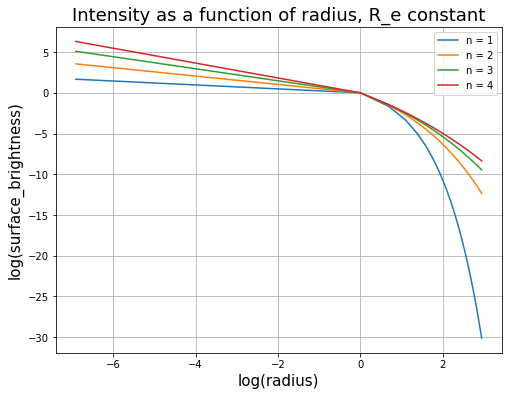

In [2]:
n = np.array([1,2,3,4])

R = np.arange(0.001,20)
I_e = 1
R_e = 1

plt.figure(figsize=(8,6))
for ser in range(0,len(n)):
    for i in range(0,len(R)):
        b_n = 1.9992*n[ser] - 0.3271
        intensity = I_e * np.exp(-b_n * ((R/R_e)**(1/n[ser])-1))
    plt.plot(np.log(R),np.log(intensity),label='n = %s' % n[ser])  

plt.legend()
plt.grid()
plt.xlabel('log(radius)',fontsize=15)
plt.ylabel('log(surface_brightness)',fontsize=15)
plt.title('Intensity as a function of radius, R_e constant',fontsize=18)

The shape of each curve is at least sensical. As I typed above, the smallest n value (n=1) begins quite shallow at low radius values, then quickly steepens as the curve moves along the x-axis; and, conversely, the higher n values are increasingly steeper at low R and gradually steepen as R rises.

-------------------------------

#### Plot a sersic profile with n=1, but with different Re, and all normalized to have the same intensity at the effective radius.


Text(0.5, 1.0, 'Intensity as a function of radius, n = 1')

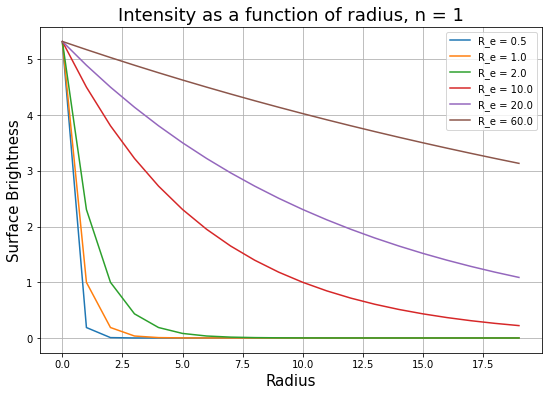

In [3]:
n = 1
R = np.arange(0.001,20)

#I am not too sure what values for R_e are conventional, so I will add a few integers...

R_e = np.array([0.5,1,2,10,20,60])
b_n = 1.9992*n - 0.3271

#I also exclude the exponent attached to R/R_e, since 1/n = 1.
#I withhold from log-log space, as I think linear curves are a bit simpler to interpret here.

plt.figure(figsize=(9,6))
for rad in range(0,len(R_e)):
    for i in range(0,len(R)):        
        intensity = I_e * np.exp(-b_n * ((R/R_e[rad]) - 1))
    plt.plot(R,intensity,label='R_e = %s' % R_e[rad])  

plt.legend()
plt.grid()
plt.xlabel('Radius',fontsize=15)
plt.ylabel('Surface Brightness',fontsize=15)
#plt.ylim(-25,3)
plt.title('Intensity as a function of radius, n = 1',fontsize=18)

Here, it appears that a larger effective radius translates to a more spread (and larger) surface brightness - that is, less of the total intensity is concentrated at the object's center and does not dip as radically as the annulus grows. Indeed, that the $R_e$ = 0.5, 1.0, 2.0 dip so considerably at the outset suggests that if the radius relative to the center increases even slightly, the surface brightness at that distance dramatically lowers.

-------------------------------------

#### For both of the above examples, integrate the total luminosity out a final radius extending from R/Re=0.1 to R/Re=10. When doing the integral, remember that you are not integrating the 1D profile, but integrating a 2D disk, whose 1D radial profile is the sersic profile. For each of the cases above, make a plot of L(<R/Re)/Ltot vs. R/Re.

The first example uses

$ I(R) = I_e \exp{\left(-b_n \left[ (\frac{R}{R_e})^{1/n} - 1\right] \right)} $

The conversion from flux to luminosity within some washer-like shape (with $0.1R_e < R < 10R_e$) of the profile disk --> integrate.

$ L(<R) = \int_{R = 0.1R_e}^{R = 10R_e} \int_{0}^{2\pi} I(R')R'dR'd\theta$

$ L(<R) = 2\pi \int_{R = 0.1R_e}^{R = 10R_e} I(R')R'dR'$

$ L(<R) = 2\pi I_e e^{b_n} \int_{R = 0.1R_e}^{R = 10R_e} (e^{-b_n (\frac{R'}{R_e})^{1/n}} R'dR')$

I *did* find a tutorial to guide the solving of this convoluted string of variables, with the trick being to try and recover the gamma function. First use "u-substitution":

$ u = b_n (\frac{R}{R_e})^{1/n} $   ____________ the exponent of the exponential

(lower bound: $u_{0.1R_e} = b_n (0.1^{1/n})$, upper bound: $u_{10R_e} = b_n (10^{1/n})$)

$ R_e \left( \frac{u}{b_n} \right)^n = R $

$ dR = \frac{nR_e}{b_n^n}u^{n-1}du$

As such, the intregral becomes,

$L = 2\pi I_e e^{b_n}\int _{u_{0.1R_e}} ^ {u_{10R_e}} {e^{-u} R_e \left( \frac{u}{b_n} \right)^n \frac{nR_e}{b_n^n}u^{n-1}du} $

$L = C \int_{u_{0.1R_e}} ^ {u_{10R_e}} {e^{-u} u^{2n-1}du} $, where $C = \frac{nR_e^2}{b_n^{2n}}2\pi I_e e^{b_n}$.

Using the incomplete gamma function (I suppose..?),

$ \gamma (2n,x) = \int_0^x e^{-u}u^{2n-1}du $,

and applying the following integration principles,

$ \int_a^c = \int_a^b + \int _b^c $ (a<b<c) and $\int_d^e = -\int _e^d$,

I find the following...

$ L = -C \int _0 ^{u_{0.1R_e}}{e^{-u} u^{2n-1}du} + C \int _0 ^ {u_{10R_e}} {e^{-u} u^{2n-1}du}$

$ L = -C\gamma(2n,u_{0.1R_e}) + C\gamma(2n,u{10R_e})$

$L = C(\gamma(2n,b_n(10^{1/n})) - \gamma(2n,b_n (0.1^{1/n}))$ 

(for $0.1R_e < R < 10R_e$).

---------------------------------------------------------

In [4]:
#notes...

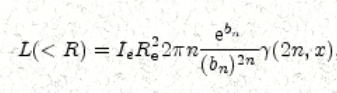

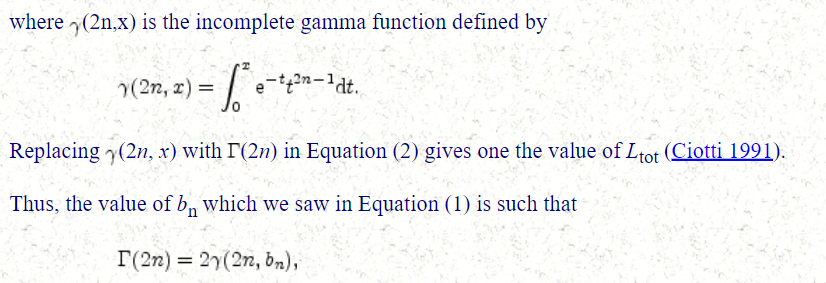

http://www-star.st-and.ac.uk/~spd3/Teaching/AS3011/AS3011_5.pdf

https://ned.ipac.caltech.edu/level5/March05/Graham/Graham2.html#note3